In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR VERSION

## Part 2: Exploratory Data Analysis (EDA) and Observations

A university's admission is related to the different aspects of the society, and often becomes a good reflection on societal's values and dynamic. For this part of the assignment, we will be working with a segment of **UC Berkeley's 1973 graduate admission data** to further explore how gender (recorded binary: Female and Male during 1973) plays a role in admission.

In *Part 1: Observation and Instrumentation*, we explored the data from a less objective lens by making obsersvations, claims, and credence levels to what we thought the dataset represented simply by taking glances at the raw data. In this part, we will get the chance to really dive into the data by performing Exploratory Data Analysis.

Exploratory Data Analysis, or EDA for short, is the process of analyzing/summarizing data to extract valuable insights and patterns that can help guide further analysis. EDA is usually performed at the beginning of a data science project and helps to guide the direction of the analysis. EDA allows us to gain an understanding of the data, identify any patterns or anomalies, and detect any potential issues that may affect the analysis. In the following problems, we will perform EDA on our admission rates dataset.

In *Part 1*, we explored the data with respect to gender and admission rates. Now, let's take a look at how gender plays a role in admission rates. 


## **Question 1: Comprehensive Analysis**

**Question 1.1)** Like last lab, load the *```berkeley.csv```* dataset below.

In [2]:
# Instructor Solution

berkeley = pd.read_csv('berkeley.csv')
berkeley.head(15)

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,F,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,A,M,Accepted


**Question 1.2)** Using the `berkeley` dataset, calculate the number of acceptances, rejections, total applicants, and acceptance rate for each combination of major and gender. For clarity, your DataFrame should have the following columns: Major, Gender, Accepted, Rejected, Counts, and Acceptance Rate.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>Start this problem by using `groupby` on the `"Major"` and `"Gender"` columns. Set this to `grouped_data`.</i>
- <i>Using `grouped_data`, calculate the counts for accepted, rejected, and total counts. 
- <i>`Pandas`' `apply` method and the helper functions provided may be useful here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html</i>
- <i>Your resulting DataFrame should resemble the table below:</i> <br> <br>
![admissions_by_all_output](admissions_by_all_output.png)

</details>

In [21]:
# Useful Helper Functions

def accepted_count(x):
    return (x == "Accepted").sum()

def rejected_count(x):
    return (x == "Rejected").sum()

In [16]:
# Instructor Solution

grouped_data = berkeley.groupby(['Major', 'Gender'])

acceptance_counts = grouped_data['Admission'].apply(accepted_count).rename('Accepted')
rejection_counts = grouped_data['Admission'].apply(rejected_count).rename('Rejected')
applicant_counts = grouped_data.size().rename('Counts')

acceptance_rate = (acceptance_counts / applicant_counts).rename('Acceptance Rate')

admissions_by_all = pd.concat([acceptance_counts, rejection_counts, applicant_counts, acceptance_rate], axis=1)
admissions_by_all.reset_index(inplace=True)
admissions_by_all

,Major,Gender,Accepted,Rejected,Counts,Acceptance Rate
0,A,F,89,19,108,0.824074
1,A,M,825,313,1138,0.724956
2,B,F,17,8,25,0.680000
3,B,M,353,207,560,0.630357
4,C,F,201,392,593,0.338954
5,C,M,120,205,325,0.369231
6,D,F,131,244,375,0.349333
7,D,M,138,279,417,0.330935
8,E,F,94,299,393,0.239186
9,E,M,53,138,191,0.277487


**Question 1.3)** Before we can build a `bar` plot that visualizes the acceptance rates by major and gender, we must first calculate the admission errors for each major-gender pair. 

In [17]:
# Instructor Solution

majors = admissions_by_all['Major'].unique()
admission_error = []

for major in majors:
    temp_df = admissions_by_all[admissions_by_all['Major'] == major]
    app = temp_df['Counts'].sum()
    adm = temp_df['Accepted'].sum()
    p_male_app = temp_df[temp_df['Gender'] == 'M'].reset_index()['Counts'][0] / app
    p_female_app = temp_df[temp_df['Gender'] == 'F'].reset_index()['Counts'][0] / app
    var_m = (1 - p_male_app) / p_male_app * (adm / app**2)
    var_f = (1 - p_female_app) / p_female_app * (adm / app**2)
    admission_error.extend([np.sqrt(var_m), np.sqrt(var_f)])

admissions_by_all["Admission Error"] = admission_error
admissions_by_all

,Major,Gender,Accepted,Rejected,Counts,Acceptance Rate,Admission Error
0,A,F,89,19,108,0.824074,0.007475
1,A,M,825,313,1138,0.724956,0.078762
2,B,F,17,8,25,0.680000,0.006947
3,B,M,353,207,560,0.630357,0.155621
4,C,F,201,392,593,0.338954,0.026363
5,C,M,120,205,325,0.369231,0.014449
6,D,F,131,244,375,0.349333,0.019638
7,D,M,138,279,417,0.330935,0.021838
8,E,F,94,299,393,0.239186,0.029780
9,E,M,53,138,191,0.277487,0.014473


**Question 1.4)** Construct a `bar` plot that visualizes the admission rates by gender within each major. We recommend using helper function provided below `hued_barplot_with_error`.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>Each x variable should be a different major plotting the acceptance rates for the two genders.</i>
- <i>Use the `hue` parameter as a way to differentiate between the two genders</i>
- <i>`df` should be type `pd.Dataframe`. `x`, `y`, `hue`, and `error` should be type `str`

</details>

In [22]:
# Useful Helper Function

def hued_barplot_with_error(df, x, y, hue, error):
    fig, ax = plt.subplots(figsize=(12, 6))

    bar_width = 0.35

    majors = df[x].unique()
    bar_positions = np.arange(len(majors))

    for i, gender in enumerate(df[hue].unique()):
        gender_data = df[df[hue] == gender]
        positions = bar_positions + i * bar_width
        ax.bar(positions, gender_data[y], bar_width, 
            label=gender, yerr=gender_data[error], capsize=5)
        
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title('Acceptance Rates by Major and Gender with Error Bars')
    ax.set_xticks(bar_positions + bar_width / 2)
    ax.set_xticklabels(majors)
    ax.legend(title=hue)
    plt.show()

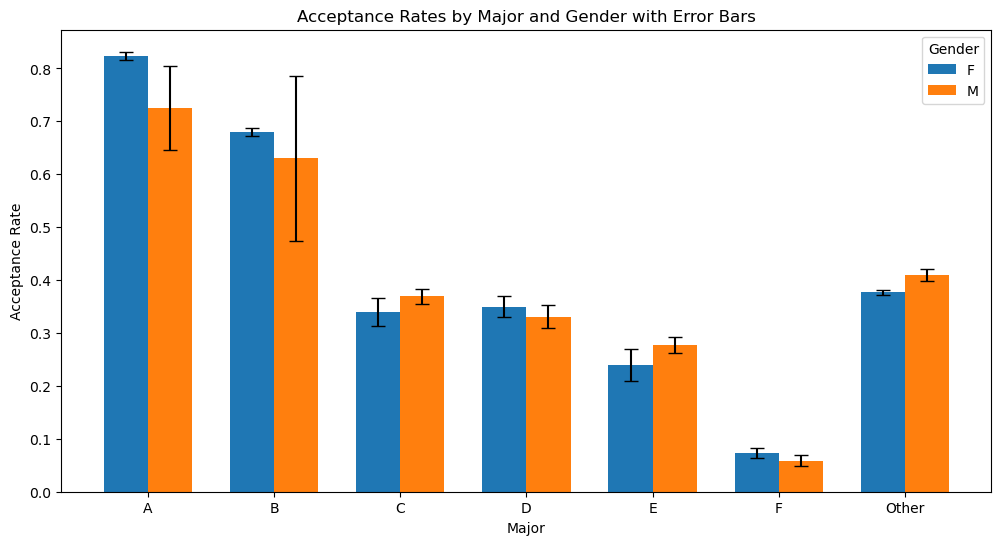

In [23]:
# Instructor Solution

hued_barplot_with_error(admissions_by_all, 'Major', 'Acceptance Rate', 'Gender', 'Admission Error')

**TODO:** *Make point more clear ; for every individual majors, is there any statistically signficant difference in the admissions rates between male and female applicants; look at width of error bars (maybe no hints); expect 2/3 bars will include correct expected values*;;; might be easier if you ask afterwards (HINT: Do the bars differ from an amount more than the height of each error bar? If each error bar represents 68% CI, how many of these categories to do you "expect to be statistically signficant" due to random chance)

**Question 1.5)** Looking at the bar plot you made above, what do you conclude about the admission rates between male and female applicants? Is there any noticeable discrepency in the admission rates between male and female applicants, given the rates per major? How is it different from the observations you made in questions 1 and 2? *Bonus: How have your credence levels changed from Part 1?*

*Your Answer Here*

**Question 1.6)** https://rpubs.com/masiyab/937036

In [58]:
# Useful Helper Function

def plot_admissions(df, x, hue, y1, y2):
    fig, ax = plt.subplots(figsize=(14, 8))

    bar_width = 0.35
    space = 0.05

    majors = df[x].unique()
    bar_positions = np.arange(len(majors))

    female_data = df[df[hue] == 'F']
    ax.bar(bar_positions - (bar_width + space)/2, female_data[y1], bar_width, label='{y1} (F)', color='grey')
    ax.bar(bar_positions - (bar_width + space)/2, female_data[y2], bar_width, label='{y2} (F)', color='red', bottom=female_data[y1])

    male_data = df[df[hue] == 'M']
    ax.bar(bar_positions + (bar_width + space)/2, male_data[y1], bar_width, label='{y1} (M)', color='grey', hatch='//')
    ax.bar(bar_positions + (bar_width + space)/2, male_data[y2], bar_width, label='{y2} (M)', color='red', hatch='//', bottom=male_data[y1])

    ax.set_xlabel('Major')
    ax.set_ylabel('Count')
    ax.set_title("Admissions for each Department at UC Berkeley")
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(majors)
    ax.legend()
    plt.show()

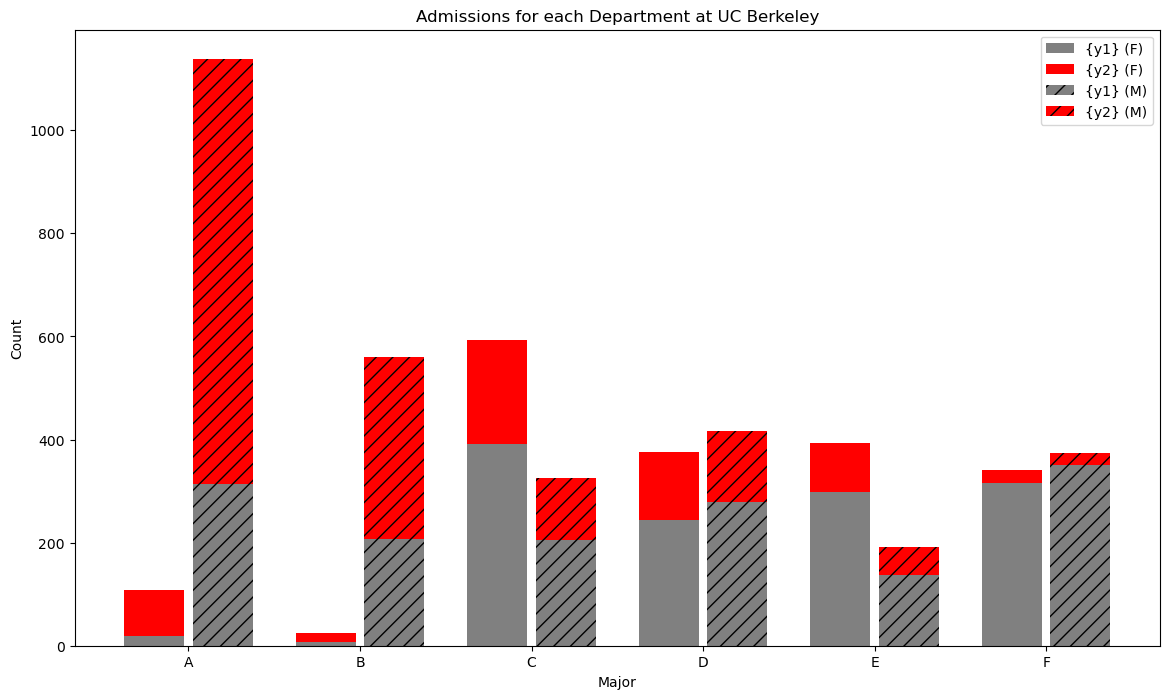

In [59]:
# Instructor Solultion
df_without_other = admissions_by_all[admissions_by_all["Major"] != "Other"]
plot_admissions(df_without_other, "Major", "Gender", "Rejected", "Accepted")

**Question 1.7)** Short-response question

*Your Answer Here*